In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
import warnings
warnings.filterwarnings("ignore")


In [139]:
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [141]:
df.drop('PatientId', axis = 1, inplace = True)
df.drop('AppointmentID', axis = 1, inplace = True)
df.drop('ScheduledDay', axis = 1, inplace = True)
df.drop('AppointmentDay', axis = 1, inplace = True)
df.drop('Neighbourhood', axis = 1, inplace = True)

In [196]:
df.head(30)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,62,0,1,0,0,0,0,0
1,0,56,0,0,0,0,0,0,0
2,1,62,0,0,0,0,0,0,0
3,1,8,0,0,0,0,0,0,0
4,1,56,0,1,1,0,0,0,0
5,1,76,0,1,0,0,0,0,0
6,1,23,0,0,0,0,0,0,1
7,1,39,0,0,0,0,0,0,1
8,1,21,0,0,0,0,0,0,0
9,1,19,0,0,0,0,0,0,0


In [143]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


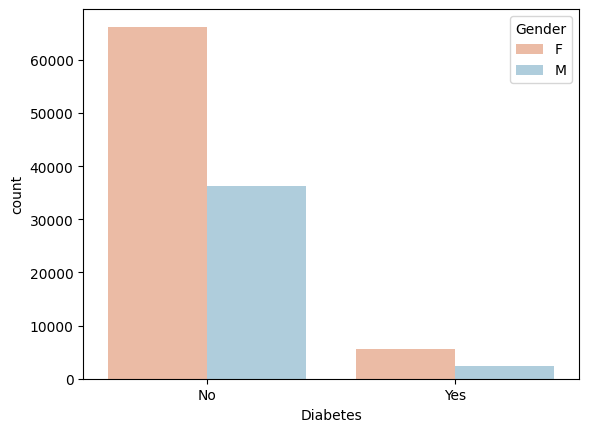

In [144]:
plt.figure()
sns.countplot(x = 'Diabetes', hue = 'Gender', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No','Yes'])
plt.show()

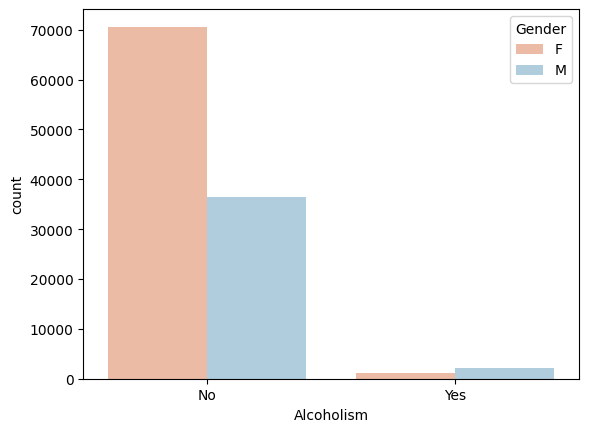

In [145]:
plt.figure()
sns.countplot(x = 'Alcoholism', hue = 'Gender', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No','Yes'])
plt.show()

In [146]:
knn_model = KNeighborsClassifier(n_neighbors = 5)

In [147]:
steps = [('knn', knn_model)]
pipeline = Pipeline(steps)

In [148]:
df[df == 'No'] = 0
df[df == 'Yes'] = 1
df[df == 'M'] = 0
df[df == 'F'] = 1

In [153]:
y = df['No-show'].values #hedef değişken
y=y.astype('int')
X = df.drop('No-show', axis = 1).values #tahmin değişkenleri
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [154]:
knn_pipeline = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.7663982629150456

In [155]:
parameters = {'knn__n_neighbors': np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

In [156]:
cv.fit(X_train, y_train)
print('Tuned KNN Parameters: {}'.format(cv.best_params_))
print('Best score is {}'.format(cv.best_score_))

Tuned KNN Parameters: {'knn__n_neighbors': 48}
Best score is 0.7973558363880924


In [157]:
parameters = {'knn__n_neighbors': np.arange(1, 100)}
cv = GridSearchCV(pipeline, param_grid=parameters, cv=10)
cv.fit(X_train, y_train)
print('Tuned KNN Parameters: {}'.format(cv.best_params_))
print('Best score is {}'.format(cv.best_score_))

Tuned KNN Parameters: {'knn__n_neighbors': 74}
Best score is 0.7977742853077292


Bir de Lojistik Regresyon yöntemi ile çalışalım.

In [158]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [160]:
accuracy_score(y_test, y_pred)

0.7992852619198407

*********Unsupervised Learning*********

K-MEANS KÜMELEME ALGORİTMASI

In [161]:
k_means = KMeans(n_clusters=2, random_state=42)
k_means.fit(X)

KMeans(n_clusters=2, random_state=42)

In [162]:
print("Adjusted Rand Index:", adjusted_rand_score(y, k_means.labels_))
print("Homojenlik Skoru:", homogeneity_score(y, k_means.labels_))
print("Completentlik Skoru:", completeness_score(y, k_means.labels_))
print("V-Measure Skoru:", v_measure_score(y, k_means.labels_))

Adjusted Rand Index: 0.0017170416861348788
Homojenlik Skoru: 0.004138842372801741
Completentlik Skoru: 0.003004391134942797
V-Measure Skoru: 0.0034815329277111634


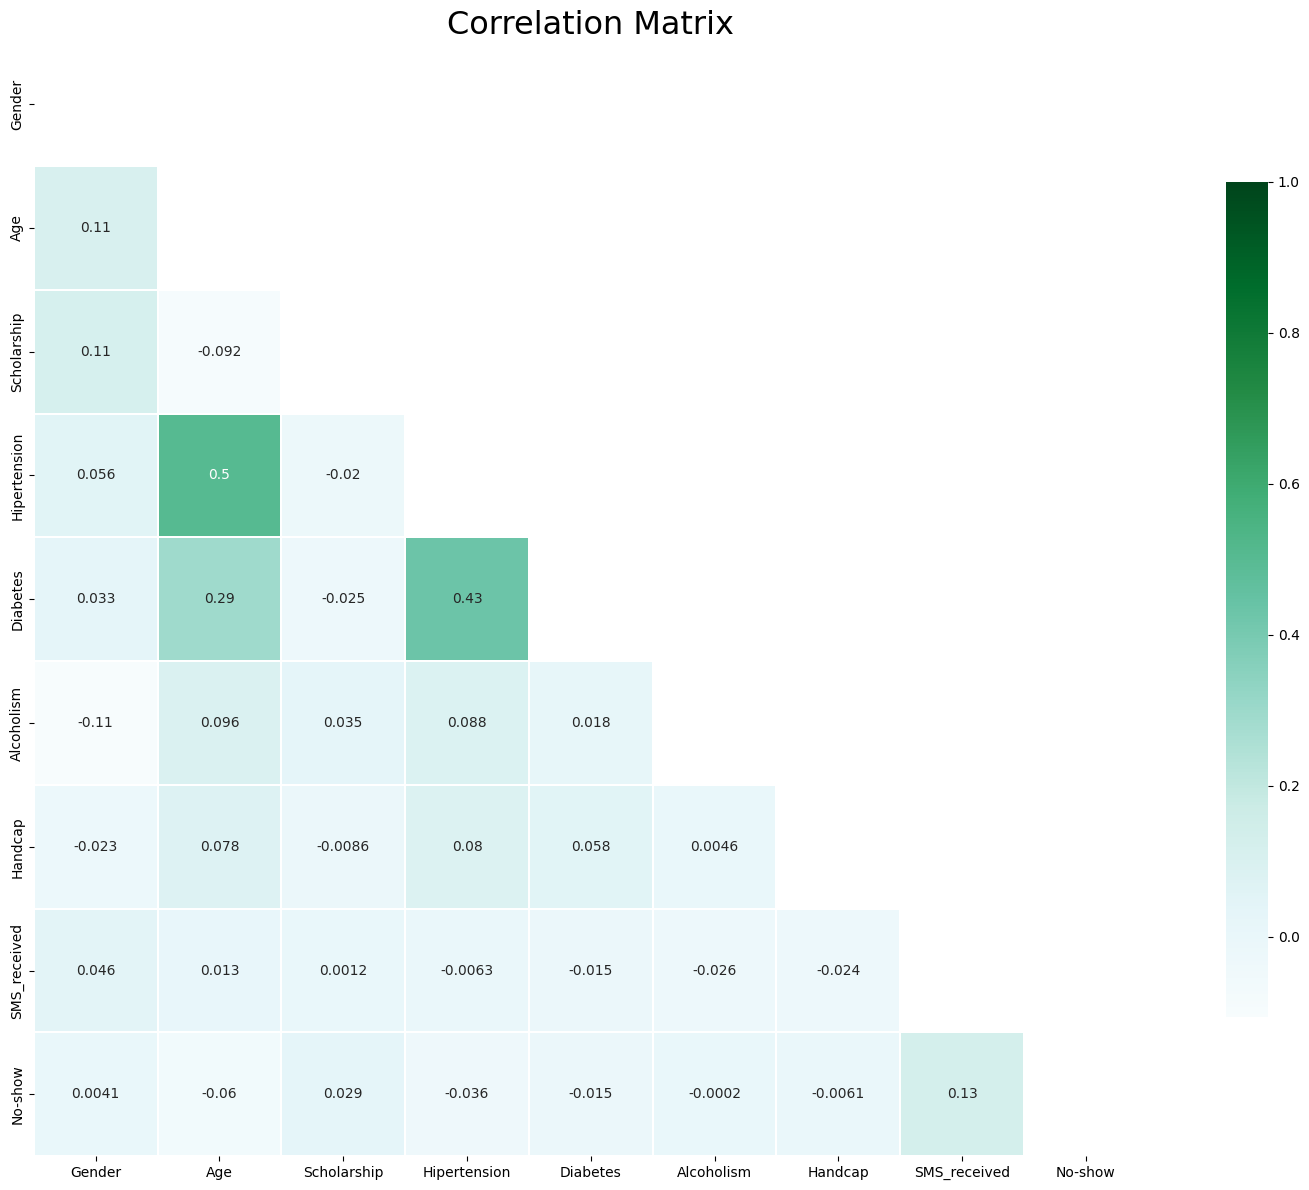

In [166]:
mask = np.zeros_like(df.corr(), dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix',fontsize=23)

sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

Text(0.5, 0.98, 'Correlation Visualizations')

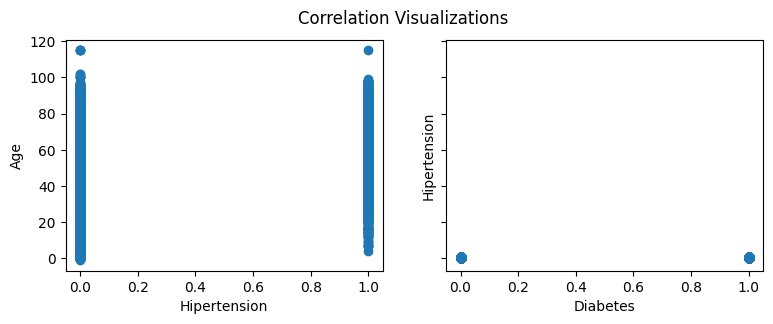

In [168]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(df["Hipertension"].values, df["Age"].values)
axs[0].set_xlabel('Hipertension')
axs[0].set_ylabel('Age')
axs[1].scatter(df["Diabetes"].values, df["Hipertension"].values)
axs[1].set_xlabel('Diabetes')
axs[1].set_ylabel('Hipertension')
fig.suptitle('Correlation Visualizations')

In [180]:
scaler = StandardScaler()
df_dropped = df.drop('Age', axis=1)
X = df_dropped.values[:,:]
scaled_x = scaler.fit_transform(X)

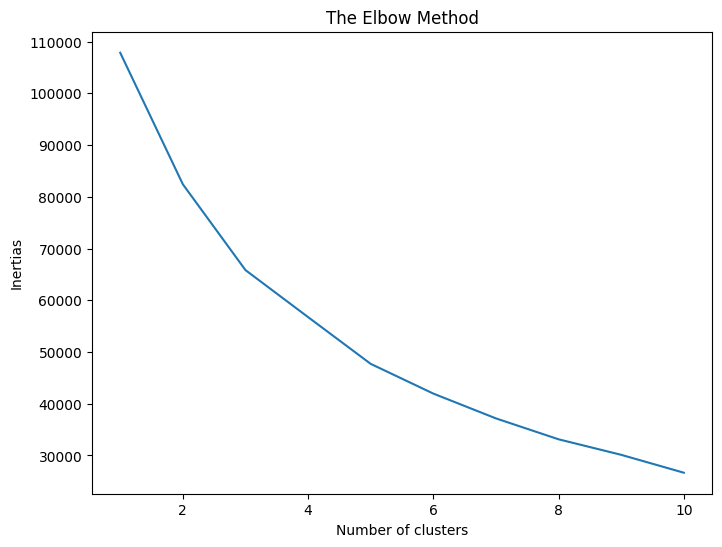

In [181]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

In [182]:
model = KMeans(n_clusters=3)
training_points = scaled_x[:60000]
test_points = scaled_x[60000:]
model.fit(training_points)
labels = model.predict(test_points)

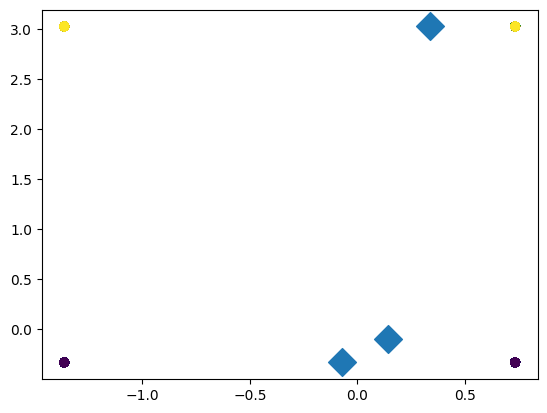

In [189]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

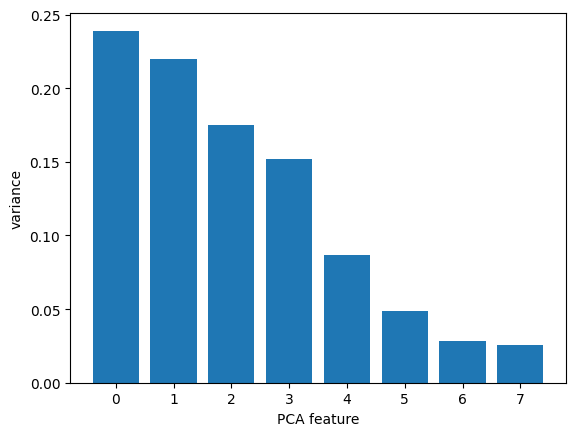

In [184]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [191]:
pca = PCA(n_components=7)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.24496076 0.22555689 0.17959511 0.15549686 0.08870575 0.04992092
 0.02929577]
0.9735320660332067


In [192]:
pca = PCA(n_components=7)
pca.fit(scaled_x)
pca_features = pca.transform(scaled_x)

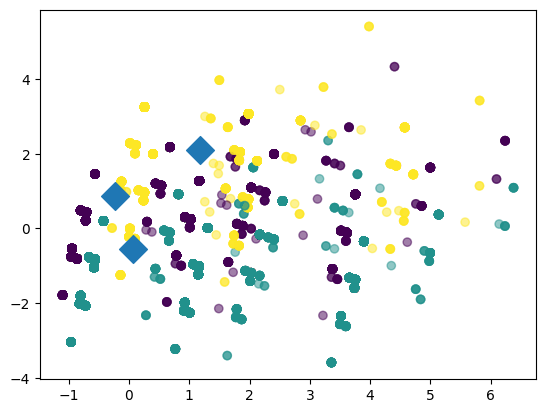

In [193]:
model = KMeans(n_clusters=3)
training_points = pca_features[:60000]
test_points = pca_features[60000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=200)
plt.show()

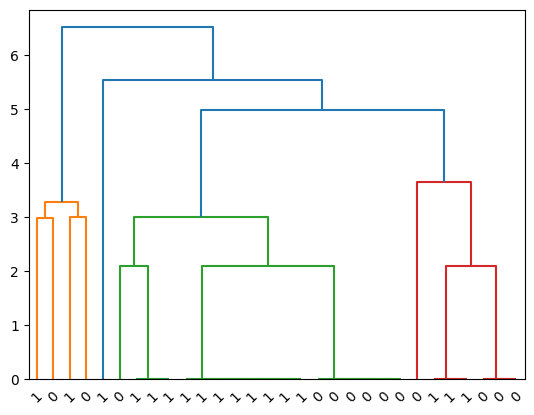

In [197]:
mergings = linkage(test_points[:30], method="complete")

dendrogram(mergings,
           labels=labels[:30],
           leaf_rotation=45,
           leaf_font_size=10,
)
plt.show()

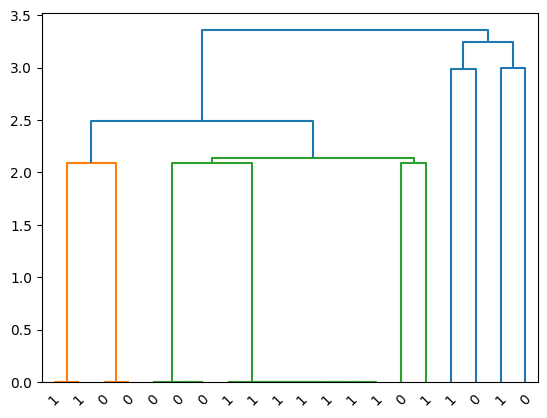

In [198]:
mergings = linkage(test_points[:20], method="single")

dendrogram(mergings,
           labels=labels[:20],
           leaf_rotation=45,
           leaf_font_size=10,
)
plt.show()